In [1]:
import openai
import pennylane as qml
from PIL import Image
import numpy as np

In [2]:
from key import api_key

In [3]:
from openai import OpenAI

client = OpenAI(api_key=api_key)

def prob_image_arr(arr, openai_api_key):
    # Use OpenAI API to interpret the text
    openai.api_key = openai_api_key

    try:
        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[
            #   {
            #      "role": "system",
            #      "content": "The model is tasked with analyzing a 2D binary array. It should output '1' if the '1's in the array form a perfect rectangle, without any breaks or irregularities. If the '1's do not form a perfect rectangle, the model should output '0'. This binary output should be based solely on the geometric arrangement of '1's within the array."
            #   },
            {
             "role": "system",
               "content": "The model is tasked to receive a 2D binary array consisting of 0s and 1s, with the 1s forming a specific shape. It should analyze this shape and calculate a score from 0 to 1 that indicates how closely this shape resembles a rectangle. A score of 1 denotes an exact rectangle, while a score of 0 indicates no resemblance to a rectangle. The model should focus on the spatial arrangement and continuity of the 1s to determine this score. The output should only be the score with a single number as output without any extra text as explanation."

            # "content": "The model's task is to analyze a 2D binary array and provide a numerical score between 0 and 1. This score represents how closely the '1's in the array resemble a rectangle, with 1 being a perfect rectangle and 0 indicating no resemblance. The model should output only the score, without any accompanying explanation."
            },
            #   {
            #      "role": "system",
            #      "content": "The model is tasked with analyzing a 2D binary array and providing a score between 0 and 1. This score should reflect how closely the arrangement of '1's within the array resembles a rectangle. A score of 1 indicates a perfect rectangle, while a score closer to 0 suggests less resemblance to a rectangle. The model should consider factors such as the continuity, alignment, and proportion of '1's in determining this score."
            #   },
              {"role": "user", "content": f"{arr}"}
            ]
        )
        # print(response)
        content = content = response.choices[0].message.content
        return content
    except Exception as e:
        return f"Error in OpenAI API call: {e}"


In [4]:
# is_arr = prob_image_arr(input_arr, api_key)
# print(is_arr)

In [5]:
import pennylane as qml
from scipy.optimize import minimize
# from pennylane import numpy as np




In [6]:
n_qubits = 8
dev = qml.device('default.qubit', wires=n_qubits)

In [7]:
def find_n_largest_numbers(arr, n):
    # Find the indices of the n largest elements
    indices = np.argsort(arr)[-n:]
    # Find the n largest elements
    largest_elements = arr[indices]
    return largest_elements, indices

def indices_to_binary(indices):
    # Convert each index to binary and ensure it's 8 bits
    return [format(index, f'0{n_qubits}b') for index in indices]

def int_to_binary(n, digits):
    binary_str = format(n, 'b')
    # Pad the binary string with leading zeros to ensure it has 'digits' length
    return binary_str.zfill(digits)

In [8]:
# Define the quantum circuit
@qml.qnode(dev)
def circuit(param,index):
    index = int_to_binary(index,n_qubits)
    for i, char in enumerate(index):
        if(char=='1'):
            qml.PauliX(wires=i)
        # qml.Hadamard(wires=i)
            
    qml.StronglyEntanglingLayers(weights=param, wires=range(n_qubits))
    # qml.BasicEntanglerLayers(weights=param, wires=range(n_qubits))
    # return qml.probs(wires=range(n_qubits))
    out = [qml.expval(qml.PauliZ(0)),qml.expval(qml.PauliZ(1)),qml.expval(qml.PauliZ(2)),qml.expval(qml.PauliZ(3)),qml.expval(qml.PauliZ(4)),qml.expval(qml.PauliZ(5)),qml.expval(qml.PauliZ(6)),qml.expval(qml.PauliZ(7))]
    # out = np.array(out)
    return out


In [9]:
def convert_to_int(nested_list):
    return [[int(element) for element in sublist] for sublist in nested_list]

def binary_array_to_png_and_display(binary_array, scale_factor=10):
    # binary_array = convert_to_int(binary_array)
    # Convert the binary array to a numpy array with values 0 and 255
    image_array = np.array(binary_array) * 255

    # Create an image object from the numpy array
    image = Image.fromarray(np.uint8(image_array), 'L')

    # Scale the image
    original_size = image.size
    scaled_size = tuple([dimension * scale_factor for dimension in original_size])
    scaled_image = image.resize(scaled_size, Image.NEAREST)
    display(scaled_image)


In [10]:
def feature_map(input_arr):
    """Flatten the 2D binary array into a 1D feature map."""
    return [item for sublist in input_arr for item in sublist]

def cosine_similarity(vec1, vec2):
    """Calculate the cosine similarity between two vectors."""
    vec1, vec2 = np.array(vec1), np.array(vec2)
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    # if(norm_vec2*norm_vec1==0): return 0
    similarity = dot_product / (norm_vec1 * norm_vec2)
    # similarity = dot_product / (norm_vec1 )
    # similarity = dot_product
    return similarity

In [11]:
a = int_to_binary(4,5)
for i, char in enumerate(a):
    if(char=='1'):
        print(True)

True


In [12]:
# smiley_pattern = np.array([
#         [0, 0, 0, 0, 0, 0, 0, 0],
#         [0, 0, 1, 0, 0, 1, 0, 0],
#         [0, 0, 0, 0, 0, 0, 0, 0],
#         [0, 1, 0, 0, 0, 0, 1, 0],
#         [0, 0, 1, 1, 1, 1, 0, 0],
#         [0, 0, 0, 0, 0, 0, 0, 0],
#         [0, 0, 0, 0, 0, 0, 0, 0],
#         [0, 0, 0, 0, 0, 0, 0, 0]
#     ])

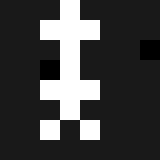

In [13]:

smiley_pattern = np.array([ 
        [0.1,0.1,0.1, 1,0.1,0.1,0.1,0.1],
        [0.1,0.1, 1, 1,1,0.1,0.1,0.1],
        [0.1,0.1,0.1, 1,0.1,0.1,0.1,0 ],
        [0.1,0.1,0, 1,0.1,0.1,0.1,0.1],
        [0.1,0.1, 1, 1, 1,0.1,0.1,0.1],
        [0.1,0.1,0.1, 1,0.1,0.1,0.1,0.1],
        [0.1,0.1, 1,0.1, 1,0.1,0.1,0.1],
        [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]])
binary_array_to_png_and_display(smiley_pattern,scale_factor=20)

smiley_pattern_vec = feature_map(smiley_pattern)

0: ────╭StronglyEntanglingLayers(M0)─┤  <Z>
1: ────├StronglyEntanglingLayers(M0)─┤  <Z>
2: ────├StronglyEntanglingLayers(M0)─┤  <Z>
3: ────├StronglyEntanglingLayers(M0)─┤  <Z>
4: ────├StronglyEntanglingLayers(M0)─┤  <Z>
5: ────├StronglyEntanglingLayers(M0)─┤  <Z>
6: ────├StronglyEntanglingLayers(M0)─┤  <Z>
7: ──X─╰StronglyEntanglingLayers(M0)─┤  <Z>
M0 = 
[[[0.86391226 0.39884452 0.72015781]
  [0.31177318 0.1193556  0.86131975]
  [0.10146719 0.7153737  0.14912626]
  [0.11494819 0.6252484  0.3316088 ]
  [0.72345123 0.630595   0.63868263]
  [0.36206053 0.54077281 0.30870397]
  [0.0744314  0.14184855 0.53175403]
  [0.66815934 0.60044196 0.43190653]]

 [[0.91911441 0.83875398 0.49044617]
  [0.51249172 0.89102115 0.4954807 ]
  [0.83619322 0.77131748 0.55332449]
  [0.6837853  0.28199885 0.68873974]
  [0.62906463 0.20410673 0.1516003 ]
  [0.28139499 0.26884685 0.93590476]
  [0.07022801 0.03346009 0.29561324]
  [0.42198347 0.87833653 0.89589549]]

 [[0.26080721 0.11918315 0.47254079]
  [0.6078

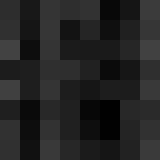

Current loss: 0.6451351846767419


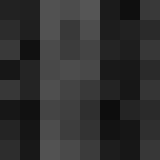

Current loss: 0.5863689034039266


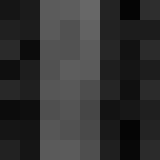

Current loss: 0.569796125657577


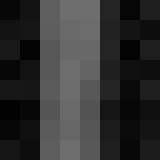

Current loss: 0.5616504704800727


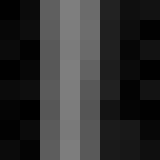

Current loss: 0.5581673056906769


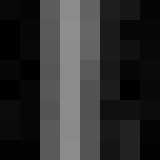

Current loss: 0.5557256218282467


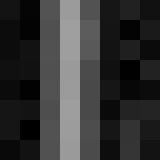

Current loss: 0.5546412103334956


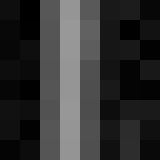

Current loss: 0.5543194611191464


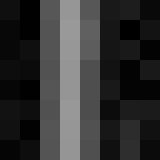

Current loss: 0.5540836721917053


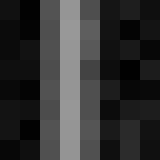

Current loss: 0.5519741351468215


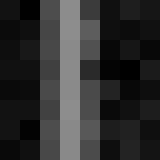

Current loss: 0.54849483631996


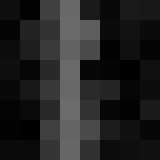

Current loss: 0.547075947311081


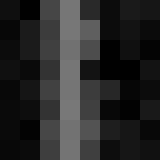

Current loss: 0.5463072531594625


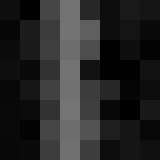

Current loss: 0.5460251300052119


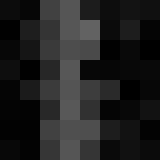

Current loss: 0.5445067114619915


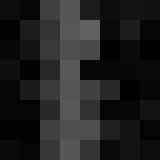

Current loss: 0.543748193461854


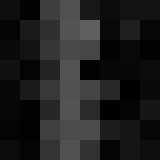

Current loss: 0.542396836255213


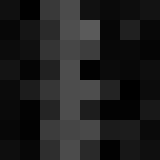

Current loss: 0.5399210388046861


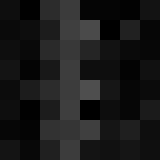

Current loss: 0.5385132907613445


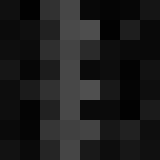

Current loss: 0.5372137132243713


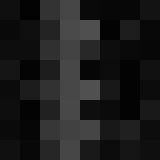

Current loss: 0.5360073937693517


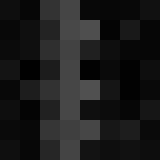

Current loss: 0.533907903799639


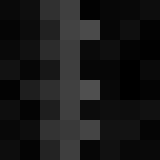

Current loss: 0.5311620642178582


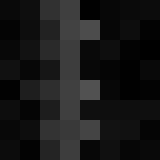

Current loss: 0.5306689841307203


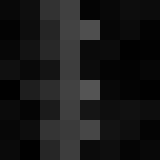

Current loss: 0.5300815787652384


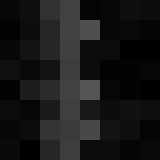

Current loss: 0.5295533784986098


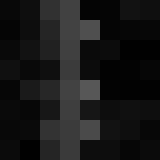

Current loss: 0.5287743401819804


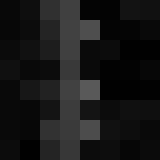

Current loss: 0.5282730884219557


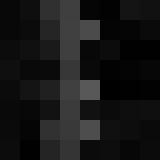

Current loss: 0.5278209783149226


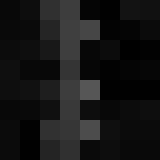

Current loss: 0.5270041899981542


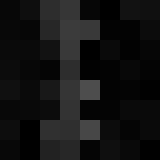

Current loss: 0.5260108624279383


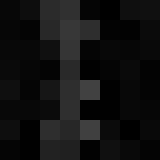

Current loss: 0.5252961033032392


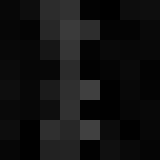

Current loss: 0.5245274914223024


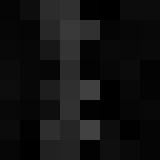

Current loss: 0.5237668626300085


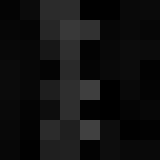

Current loss: 0.5226956514053758


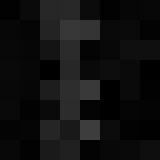

Current loss: 0.5219353382320769


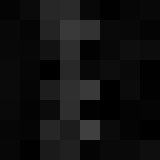

Current loss: 0.5209423043257505


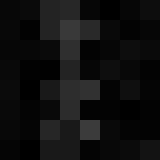

Current loss: 0.5205987624437588


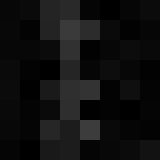

Current loss: 0.5200861030302353


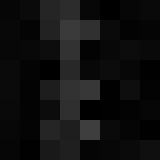

Current loss: 0.5194737332949294


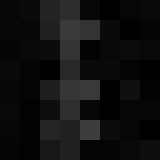

Current loss: 0.5187690627214301


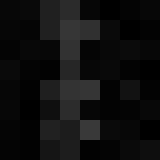

Current loss: 0.5176623053874274


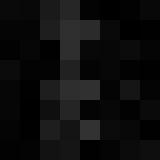

Current loss: 0.5164360554244763


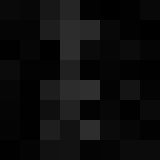

Current loss: 0.5157799737076385


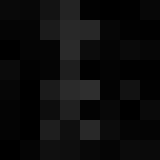

Current loss: 0.5149637117839296


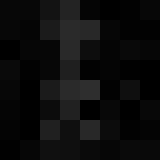

Current loss: 0.5137833375127643


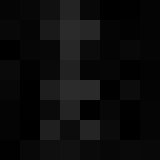

Current loss: 0.5117354497061025


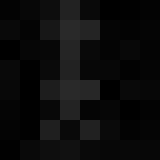

Current loss: 0.5109610993042291


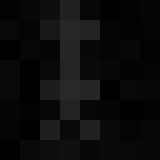

Current loss: 0.5100900504781385


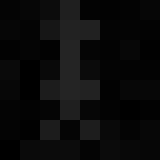

Current loss: 0.5091290321463308


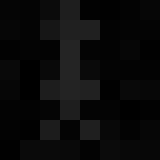

Current loss: 0.50807014355683


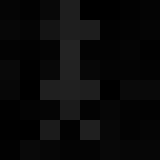

Current loss: 0.5071508784809952


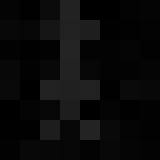

Current loss: 0.5065797015887977


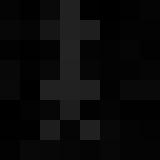

Current loss: 0.506014763631216


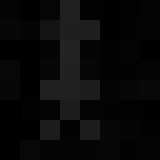

Current loss: 0.5053490739638115


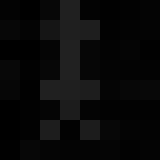

Current loss: 0.5049071553211223


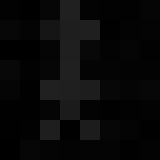

Current loss: 0.5042797345335155


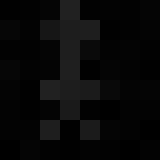

Current loss: 0.5039710068801808


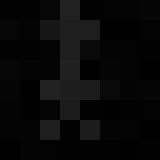

Current loss: 0.5035147068831742


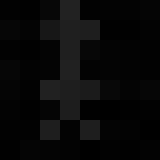

Current loss: 0.5030992933663663


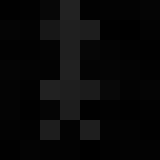

Current loss: 0.5028122489733564


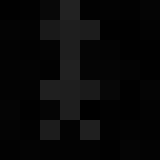

Current loss: 0.5025391927625268


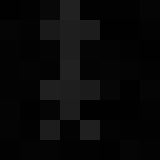

Current loss: 0.502289159837912


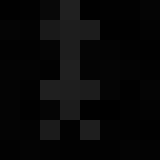

Current loss: 0.5020393445136022


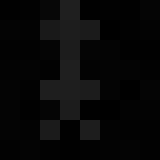

Current loss: 0.5018408796898746


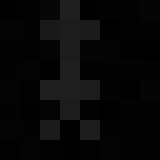

Current loss: 0.5016399182028348


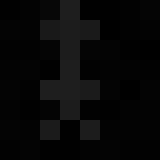

Current loss: 0.5015128989577112


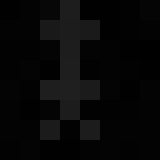

Current loss: 0.5013964591102426


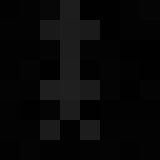

Current loss: 0.5012725668324609


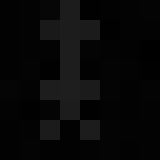

Current loss: 0.5010977827874273


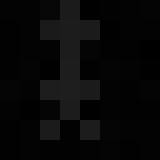

Current loss: 0.5009680535522005


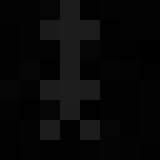

Current loss: 0.5008763612408986


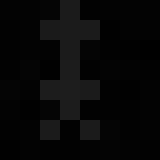

Current loss: 0.5008123726076743


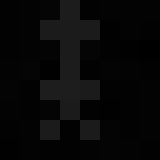

Current loss: 0.500740491356686


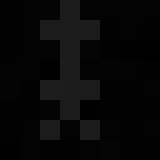

Current loss: 0.5006603146945888


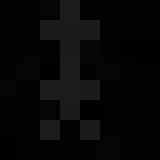

Current loss: 0.5006031762591525


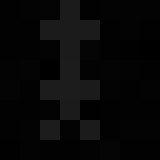

Current loss: 0.50056817469562


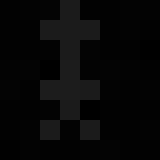

Current loss: 0.5005389779930813


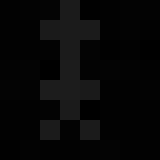

Current loss: 0.5005078871987874


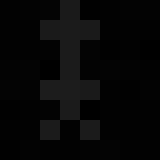

Current loss: 0.5004781127898807


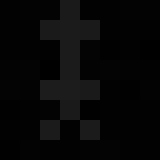

Current loss: 0.5004556051086478


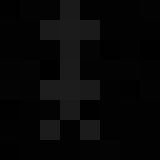

Current loss: 0.500438658437473


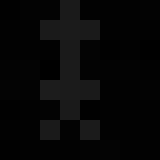

Current loss: 0.5004222509660013


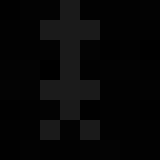

Current loss: 0.5004045668511364


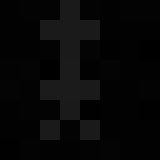

Current loss: 0.5003883786390136


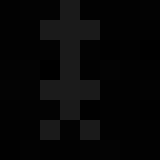

Current loss: 0.5003753127398327


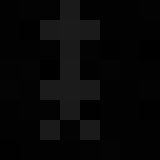

Current loss: 0.5003627666912908


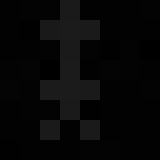

Current loss: 0.5003454786717055


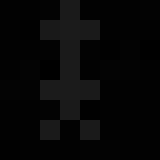

Current loss: 0.5003209400940274


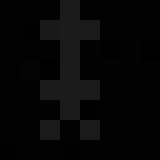

Current loss: 0.5002997291646915


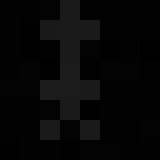

Current loss: 0.5002859565990655


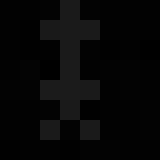

Current loss: 0.5002739891703403


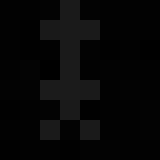

Current loss: 0.5002587724378968


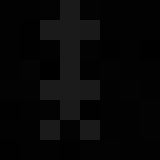

Current loss: 0.5002408932817403


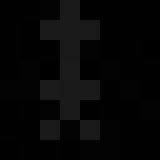

Current loss: 0.5002259761982486


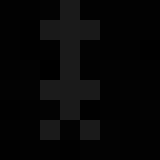

Current loss: 0.500216091436574


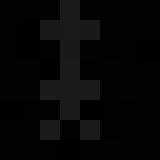

Current loss: 0.5002083683867365


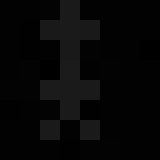

Current loss: 0.5002005600878903


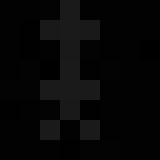

Current loss: 0.5001925311808334


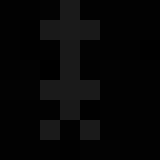

Current loss: 0.5001842133002378


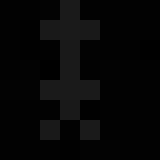

Current loss: 0.5001761012813395


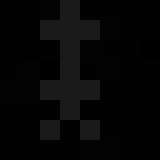

Current loss: 0.5001687897884248


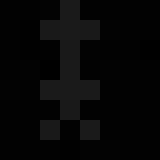

Current loss: 0.500162000350949


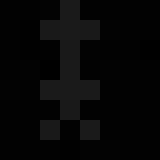

Current loss: 0.5001559895909157


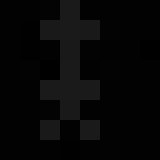

Current loss: 0.5001505221262468


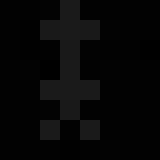

Current loss: 0.5001454536191188


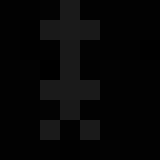

Current loss: 0.5001406137279514


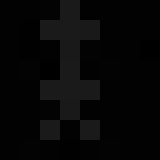

Current loss: 0.5001357191196145


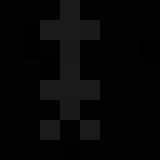

Current loss: 0.5001309237479958


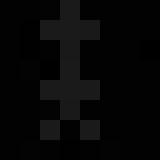

Current loss: 0.5001266131715553


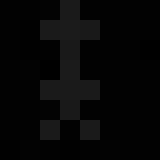

Current loss: 0.5001231535868734


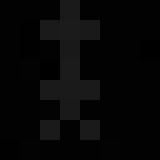

Current loss: 0.5001204096697945


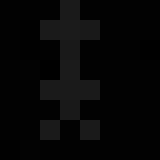

Current loss: 0.5001179829783163


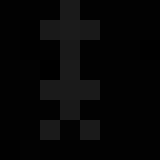

Current loss: 0.500115604375548


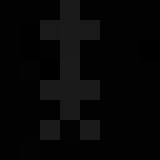

Current loss: 0.5001134106407229


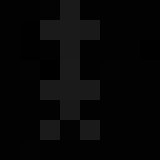

Current loss: 0.5001113371720785


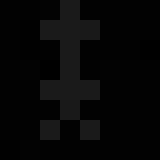

Current loss: 0.5001090981640428


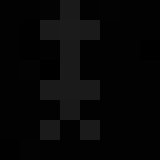

Current loss: 0.500106514093714


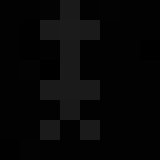

Current loss: 0.5001037747810474


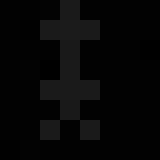

Current loss: 0.5001010831707794


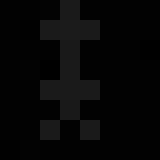

Current loss: 0.5000983787858282


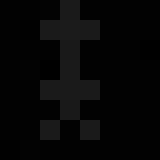

Current loss: 0.5000952201150135


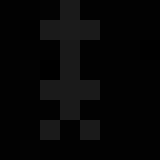

Current loss: 0.5000913728540936


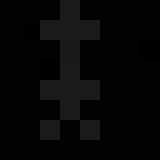

Current loss: 0.5000874117943466


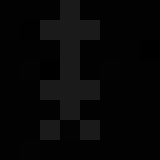

Current loss: 0.5000841604794668


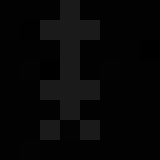

Current loss: 0.5000816880845109


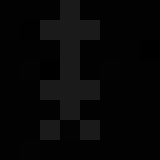

Current loss: 0.5000793589292877


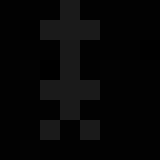

Current loss: 0.5000767015032473


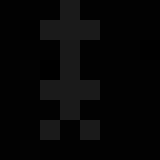

Current loss: 0.5000738591614776


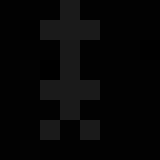

Current loss: 0.5000709552358712


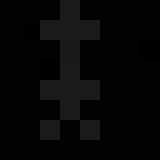

Current loss: 0.5000678938730636


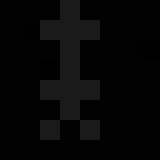

Current loss: 0.500064768375462


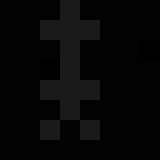

Current loss: 0.500062124142984


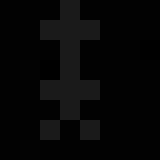

Current loss: 0.5000602884014111


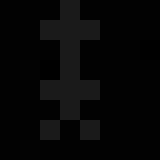

Current loss: 0.5000590191115873


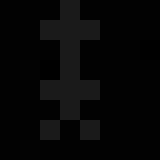

Current loss: 0.5000579016633243


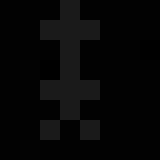

Current loss: 0.5000566302149747


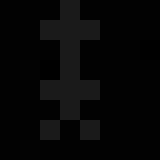

Current loss: 0.5000551885133979


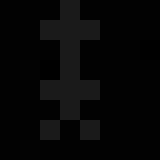

Current loss: 0.5000537332689365


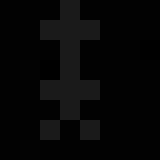

Current loss: 0.5000522609269569


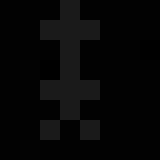

Current loss: 0.500050612283517


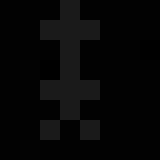

Current loss: 0.500048736783793


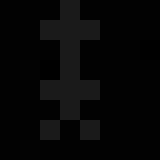

Current loss: 0.5000468979817908


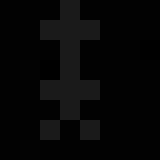

Current loss: 0.5000453901258035


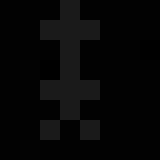

Current loss: 0.5000441795774766


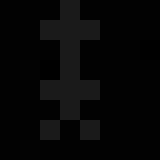

Current loss: 0.5000430977712659


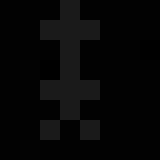

Current loss: 0.5000421585956158


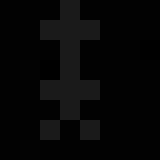

Current loss: 0.5000414374584771


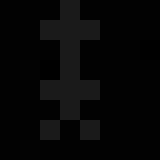

Current loss: 0.5000408113391217


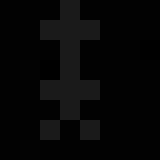

Current loss: 0.5000400313369431


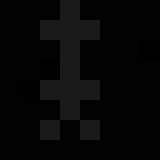

Current loss: 0.5000389134433423


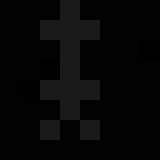

Current loss: 0.5000377460078321


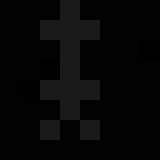

Current loss: 0.5000369718418447


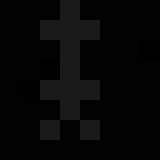

Current loss: 0.5000364919363399


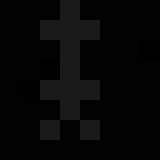

Current loss: 0.5000359713488636


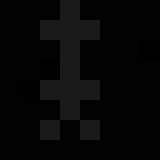

Current loss: 0.5000352410408201


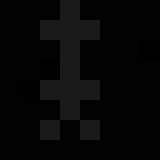

Current loss: 0.5000345037469677


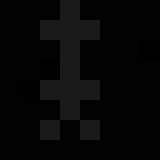

Current loss: 0.5000340431206017


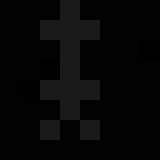

Current loss: 0.5000337843835598


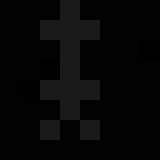

Current loss: 0.5000334956591028


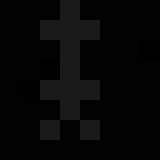

Current loss: 0.5000330274264754


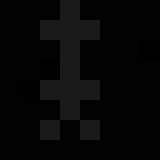

Current loss: 0.5000322910646164


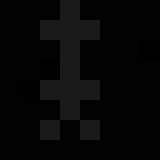

Current loss: 0.5000314027541549


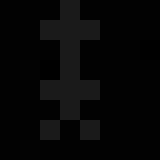

Current loss: 0.5000309104011892


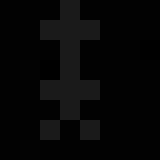

Current loss: 0.5000305269923706


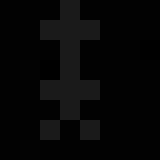

Current loss: 0.5000301833578544


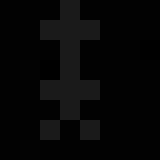

Current loss: 0.5000296460874722


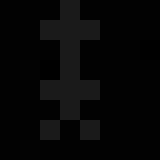

Current loss: 0.5000289189053255


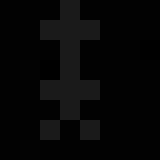

Current loss: 0.500028392641607


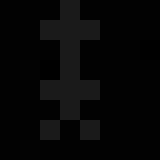

Current loss: 0.5000280433415647


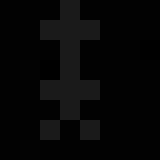

Current loss: 0.5000277467767354


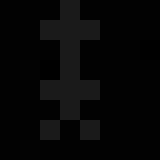

Current loss: 0.5000272994278117


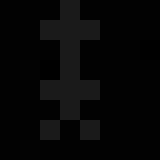

Current loss: 0.5000266785985996


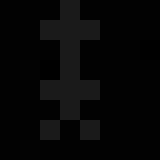

Current loss: 0.5000261289615829


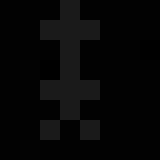

Current loss: 0.5000258266362436


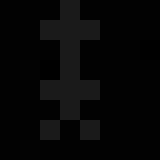

Current loss: 0.5000256216170468


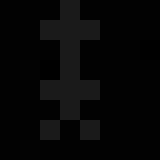

Current loss: 0.5000253599438199


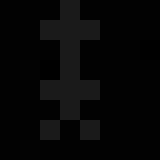

Current loss: 0.5000250292655587


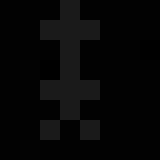

Current loss: 0.5000247532664945


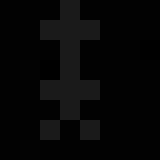

Current loss: 0.5000245788065292


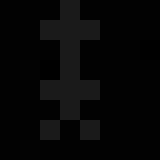

Current loss: 0.5000244151596918


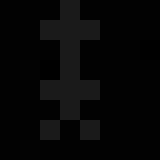

Current loss: 0.5000241525701443


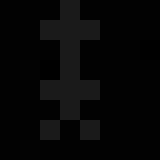

Current loss: 0.5000237332129948


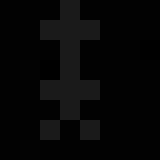

Current loss: 0.5000231542925258


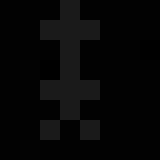

Current loss: 0.5000228056376289


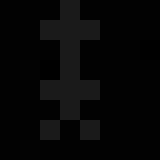

Current loss: 0.5000225594715701


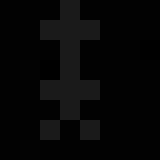

Current loss: 0.5000223383889777


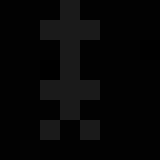

Current loss: 0.5000219775690254


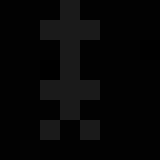

Current loss: 0.5000213879726038


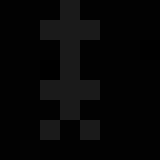

Current loss: 0.5000205241594793


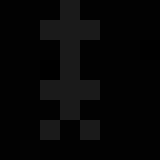

Current loss: 0.5000198384547397


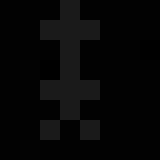

Current loss: 0.500019337089378


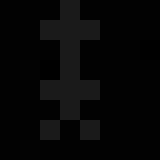

Current loss: 0.5000188928902038


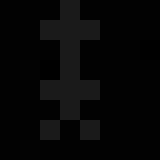

Current loss: 0.5000183955863255


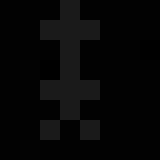

Current loss: 0.5000176284075404


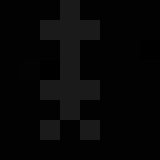

Current loss: 0.5000166384366237


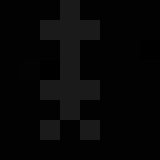

Current loss: 0.5000160401088897


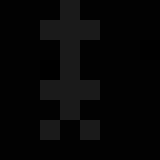

Current loss: 0.5000157217943451


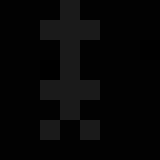

Current loss: 0.500015489227133


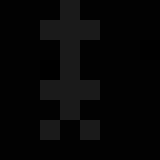

Current loss: 0.5000151603514225


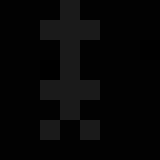

Current loss: 0.5000146712176423


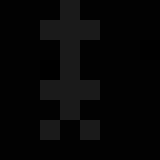

Current loss: 0.5000141444167236


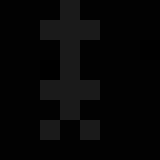

Current loss: 0.5000137206959925


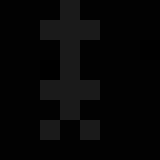

Current loss: 0.5000133958969367


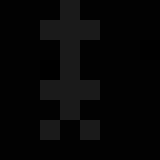

Current loss: 0.500013073988199


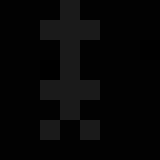

Current loss: 0.5000125724803844


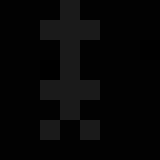

Current loss: 0.5000118341807936


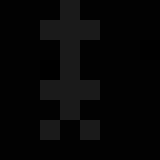

Current loss: 0.500011213157901


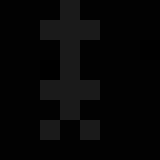

Current loss: 0.5000108934740409


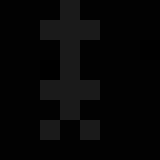

Current loss: 0.5000107474814794


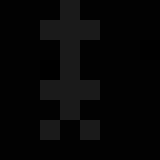

Current loss: 0.5000106355467628


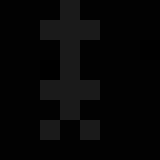

Current loss: 0.5000104501353969


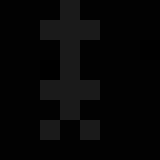

Current loss: 0.5000101450049417


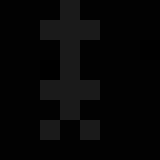

Current loss: 0.5000096924939339


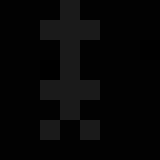

Current loss: 0.5000093078841041


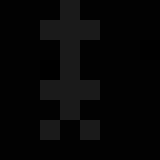

Current loss: 0.500009096268925


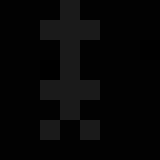

Current loss: 0.5000089449708893


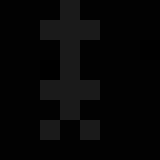

Current loss: 0.5000088237988993


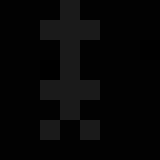

Current loss: 0.5000086221108493


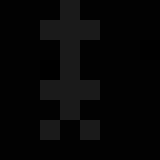

Current loss: 0.5000082945752822


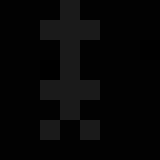

Current loss: 0.5000078426492753


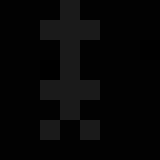

Current loss: 0.5000075863886342


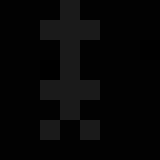

Current loss: 0.5000074306814456


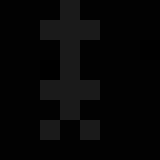

Current loss: 0.5000073366849243


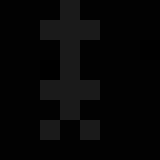

Current loss: 0.5000072033488709


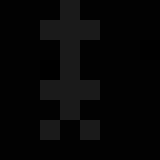

Current loss: 0.5000069800975477


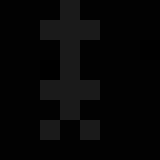

Current loss: 0.5000066048441454


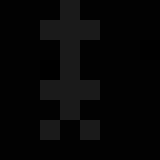

Current loss: 0.5000060287170442


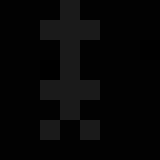

Current loss: 0.5000055088636218


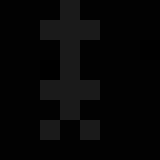

Current loss: 0.5000053070082565


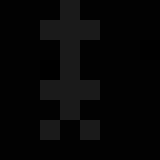

Current loss: 0.5000052197709387


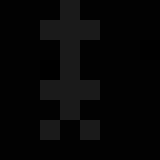

Current loss: 0.5000051911500196


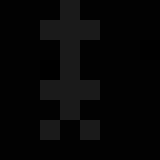

Current loss: 0.5000051466474552


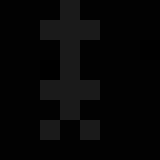

Current loss: 0.5000050701400799


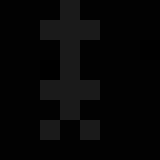

Current loss: 0.5000049375966225


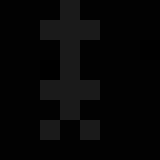

Current loss: 0.5000047203883115


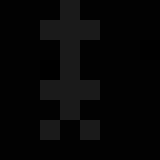

Current loss: 0.5000044367624876


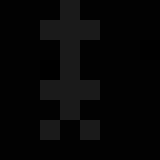

Current loss: 0.500004316742892


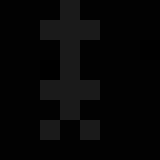

Current loss: 0.5000042473618685


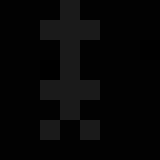

Current loss: 0.5000042324554146


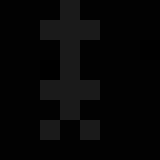

Current loss: 0.5000042217907804


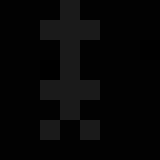

Current loss: 0.5000042031139317


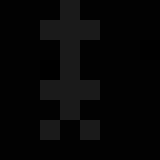

Current loss: 0.5000041698341624


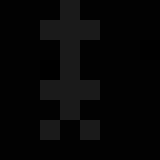

Current loss: 0.5000041124717596


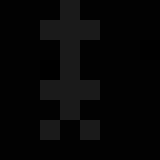

Current loss: 0.5000040251066236


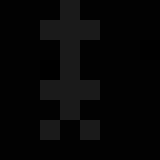

Current loss: 0.5000039548324853


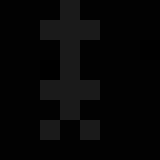

Current loss: 0.5000039202310707


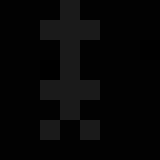

Current loss: 0.5000038961151251


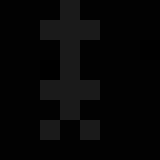

Current loss: 0.500003883123177


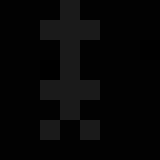

Current loss: 0.5000038613950779


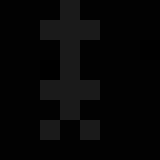

Current loss: 0.5000038234214106


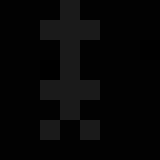

Current loss: 0.5000037571432615


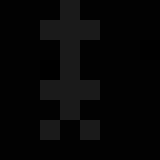

Current loss: 0.5000036478642146


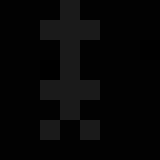

Current loss: 0.5000035019979392


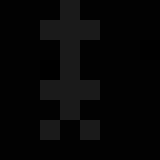

Current loss: 0.5000034325266612


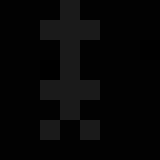

Current loss: 0.5000033863594624


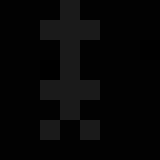

Current loss: 0.5000033663253343


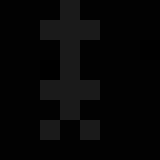

Current loss: 0.5000033355534044


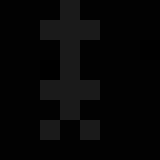

Current loss: 0.5000032833232241


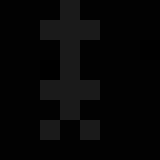

Current loss: 0.5000031928986702


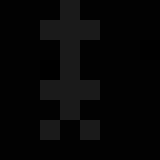

Current loss: 0.5000030426389186


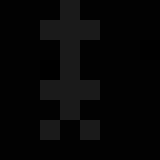

Current loss: 0.5000028332010003


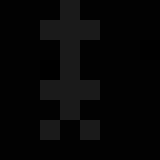

Current loss: 0.5000027220430753


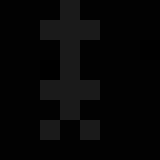

Current loss: 0.5000026618949978


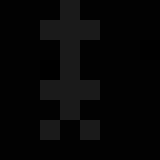

Current loss: 0.5000026296621928


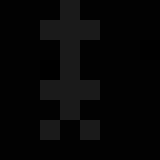

Current loss: 0.5000025932750046


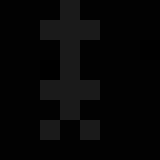

Current loss: 0.5000025332515153


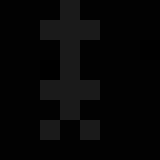

Current loss: 0.5000024331211754


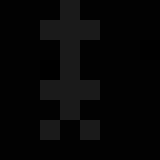

Current loss: 0.5000022752626665


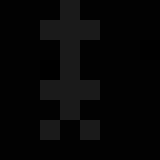

Current loss: 0.5000020948020855


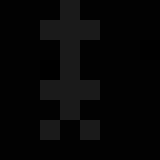

Current loss: 0.5000020011743322


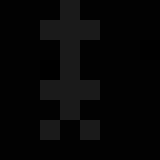

Current loss: 0.5000019380036098


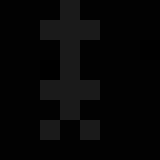

Current loss: 0.5000019112476812


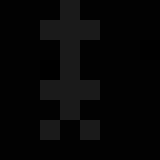

Current loss: 0.5000018837177351


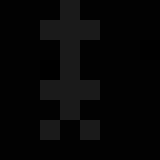

Current loss: 0.5000018385514983


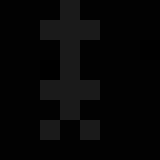

Current loss: 0.5000017609669802


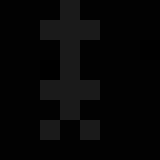

Current loss: 0.5000016280584513


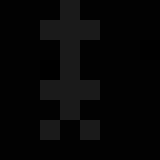

Current loss: 0.5000014149476117


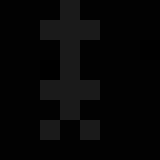

Current loss: 0.5000011598517046


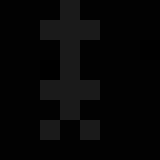

Current loss: 0.5000010419432499


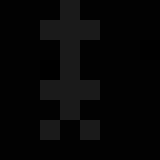

Current loss: 0.5000009742774398


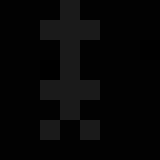

Current loss: 0.5000009637418795


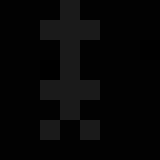

Current loss: 0.5000009583085485


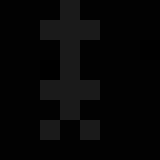

Current loss: 0.5000009496302267


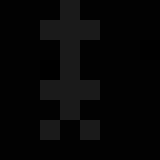

Current loss: 0.5000009349844269


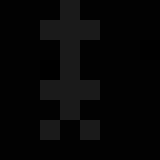

Current loss: 0.5000009098248199


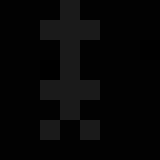

Current loss: 0.5000008673104508


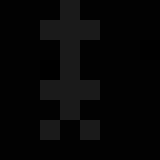

Current loss: 0.500000799966859


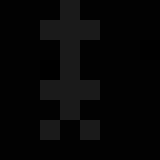

Current loss: 0.5000007168865678


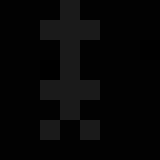

Current loss: 0.5000006662463912


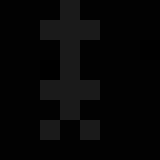

Current loss: 0.500000635678294


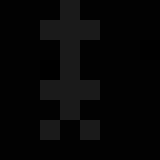

Current loss: 0.5000006275164398


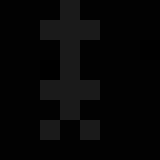

Current loss: 0.5000006235431494


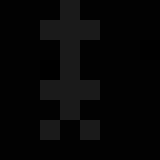

Current loss: 0.5000006177695874


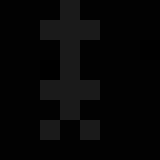

Current loss: 0.5000006076787002


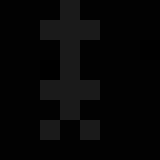

Current loss: 0.500000589965458


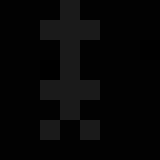

Current loss: 0.5000005600429783


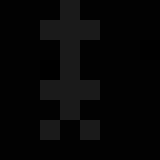

Current loss: 0.5000005152215105


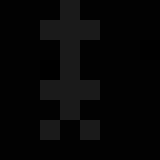

Current loss: 0.5000004784873936


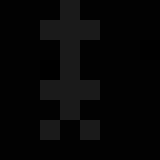

Current loss: 0.500000457462289


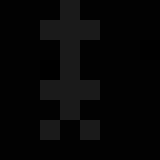

Current loss: 0.5000004477302707


In [14]:
# Define the shape of the parameters
shape_p = qml.StronglyEntanglingLayers.shape(n_layers=4, n_wires=n_qubits)
# shape_p = qml.BasicEntanglerLayers.shape(n_layers=2, n_wires=n_qubits)

# Define the objective function (to be minimized)
def objective(params):
    # print(params)
    original_length = np.prod(shape_p)
    # Extract segments for each set of weights
    weights_p1_flat = params[0 : original_length]
    # print('Param')
    # print(weights_p1_flat)
    # weights_p2_flat = params[original_length : 2*original_length]
    # weights_p3_flat = params[2*original_length : 3*original_length]
    # weights_p4_flat = params[3*original_length : 4*original_length]

    # Reshape each segment
    weights_p1 = weights_p1_flat.reshape(shape_p)
    # print(weights_p1)
    # weights_p2 = weights_p2_flat.reshape(shape_p)
    # weights_p3 = weights_p3_flat.reshape(shape_p)
    # weights_p4 = weights_p4_flat.reshape(shape_p)
    # print('===================')
    image_arr = []
    for i in range(n_qubits):
        arr = circuit(weights_p1,i)
        # largest_elements, indices = find_n_largest_numbers(arr, 1)
        # Convert indices to binary
        # binary_indices = indices_to_binary(indices)
        # print(binary_indices)
        # print(arr)
        image_arr.append(arr)
    image_arr=abs(np.array(image_arr))
    # raise Exception
    # print('==============')
    # print(image_arr)
    # Display the image
    # binary_array_to_png_and_display(image_arr,scale_factor=20)
    # print(prob_image_arr(image_arr,api_key))
    # image_arr = convert_to_int(image_arr)
    # generated_img_feature_map = feature_map(convert_to_int(image_arr))
    generated_img_feature_map = feature_map(image_arr)
    score = cosine_similarity(smiley_pattern_vec,generated_img_feature_map)
    # print(1-score)
    # raise Exception

    
    # print("Largest elements:", largest_elements)
    # print("Indices:", indices)
    # print("Indices in binary:", binary_indices)

    return 1/(score+1)
    # return -score

def callback(params):
    original_length = np.prod(shape_p)
    # Extract segments for each set of weights
    weights_p1_flat = params[0 : original_length]
    weights_p1 = weights_p1_flat.reshape(shape_p)
    image_arr = []
    for i in range(n_qubits):
        arr = circuit(weights_p1,i)
        # largest_elements, indices = find_n_largest_numbers(arr, 1)
        # Convert indices to binary
        # binary_indices = indices_to_binary(indices)
        # print(binary_indices)
        # print(arr)
        image_arr.append(arr)
    image_arr=abs(np.array(image_arr))
    binary_array_to_png_and_display(image_arr,scale_factor=20)
    loss = objective(params)
    if(loss )
    print("Current loss:", objective(params))
    
# Initialize the weights
weights_p1 = np.random.random(size=shape_p)
# weights_p2 = np.random.random(size=shape_p)
# weights_p3 = np.random.random(size=shape_p)
# weights_p4 = np.random.random(size=shape_p)

# Flatten and concatenate the initial parameters
init_params = np.concatenate([weights_p1.flatten()])
print(qml.draw(circuit)(weights_p1,1))

# Optimize using BFGS algorithm
opt = minimize(objective, init_params, method='BFGS',callback=callback)


In [15]:
print("Optimized Parameters:", opt.x)
print("Optimized Expectation Value:", opt.fun)

original_length = np.prod(shape_p)
params = opt.x
# Extract segments for each set of weights
weights_p1_flat = params[0 : original_length]
# weights_p2_flat = params[original_length : 2*original_length]
# weights_p3_flat = params[2*original_length : 3*original_length]
# weights_p4_flat = params[3*original_length : 4*original_length]

# Reshape each segment
weights_p1 = weights_p1_flat.reshape(shape_p)
# weights_p2 = weights_p2_flat.reshape(shape_p)
# weights_p3 = weights_p3_flat.reshape(shape_p)
# weights_p4 = weights_p4_flat.reshape(shape_p)
# print(circuit_res(weights_p1,weights_p2,weights_p3,weights_p4)

Optimized Parameters: [ 0.86390773  0.43475914  0.73774208  0.31177282  0.54805419  1.0144065
  0.10146376  0.35953755  0.8876739   0.11494304  0.77537447  0.04698031
  0.72344897  0.67448052  0.81613968  0.36206282  0.63710442  0.41514714
  0.07443067  0.45412571  0.48309174  0.66815624  0.46868525  0.5154299
  0.52458467  1.17066159  1.23125928  0.17059371  0.03360013  0.21855411
  0.72764016 -0.24182574  0.48942512  0.58990664  1.27537173  1.45542639
  0.40191501  0.11614851 -0.30545867  0.70651169 -0.3861654   0.50274232
  0.91351072  1.3710188   0.48477643  0.99611798  0.81578851  0.80861049
 -0.25232413  0.81413715  1.234412    0.21726519 -0.60759232 -0.30157249
 -0.01464583  0.24375945 -0.00345867  0.56734332  0.81818571  0.9733445
  0.47437989  0.80876312  0.70083881  0.81946932  0.81191793  0.62933454
  0.49061097  0.4892747   0.30954884  0.41509468  0.67093619  0.68502895
  0.6187192  -0.03274611  0.20843534  0.4312445   0.73415591  0.60536831
  0.93796363  0.50660899  0.8365

In [16]:
res = circuit(weights_p1,0)
# print(res)

In [17]:

# Example array
arr = res
n = 3

# Find n largest numbers and their indices
largest_elements, indices = find_n_largest_numbers(arr, n)

# Convert indices to binary
binary_indices = indices_to_binary(indices)

print("Largest elements:", largest_elements)
print("Indices:", indices)
print("Indices in binary:", binary_indices)


TypeError: only integer scalar arrays can be converted to a scalar index